# A/B Testing Email Campaign Project
## Exploratory Data Analysis (EDA)

### Import Libraries & Initial Setup

In [2]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Setting up the plots
sns.set_theme(style='whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [4]:
# Creating figures output directory
output_dir = '../outputs/eda'
os.makedirs(output_dir, exist_ok=True)

### Importing Dataset + Date View

In [5]:
df = pd.read_csv('../data/processed/cleaned_email_data.csv', parse_dates=['timestamp'])

df.head()

,user_id,variant,send_time,content_layout,account_age,feature_usage,user_segment,open,click,convert,timestamp,device
0,1,A,afternoon,text-heavy,216.0,48.0,active,1,1,0,2023-04-01 16:04:01,desktop
1,2,B,morning,text-heavy,1.0,20.0,new,1,1,0,2023-04-14 09:26:41,desktop
2,3,A,morning,balanced,357.0,47.0,active,0,0,0,2023-04-14 08:32:52,desktop
3,4,A,evening,balanced,262.0,33.0,active,1,1,0,2023-04-03 20:44:07,mobile
4,5,A,morning,visual-heavy,73.0,8.0,active,0,0,0,2023-04-12 11:52:06,desktop


### Preprocess Data

In [6]:
# Define Engagement Score as Weighted Sum
df['engagement_score'] = df['open'] + 2 * df['click'] + 5 * df['convert']

In [7]:
# Extract time-based features
df['day_of_week'] = df['timestamp'].dt.day_name()
df['hour_of_day'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date

In [8]:
# Recheck Data
df.head()

,user_id,variant,send_time,content_layout,account_age,feature_usage,user_segment,open,click,convert,timestamp,device,engagement_score,day_of_week,hour_of_day,date
0,1,A,afternoon,text-heavy,216.0,48.0,active,1,1,0,2023-04-01 16:04:01,desktop,3,Saturday,16,2023-04-01
1,2,B,morning,text-heavy,1.0,20.0,new,1,1,0,2023-04-14 09:26:41,desktop,3,Friday,9,2023-04-14
2,3,A,morning,balanced,357.0,47.0,active,0,0,0,2023-04-14 08:32:52,desktop,0,Friday,8,2023-04-14
3,4,A,evening,balanced,262.0,33.0,active,1,1,0,2023-04-03 20:44:07,mobile,3,Monday,20,2023-04-03
4,5,A,morning,visual-heavy,73.0,8.0,active,0,0,0,2023-04-12 11:52:06,desktop,0,Wednesday,11,2023-04-12


### Data Overview

In [9]:
# summary statistics
summary_stats = df.describe(include='all')

# Save summary statistics to a csv
summary_stats.to_csv(f"{output_dir}/summary_statistics.csv")

print('Summary Statistics:')
summary_stats


Summary Statistics:


,user_id,variant,send_time,content_layout,account_age,feature_usage,user_segment,open,click,convert,timestamp,device,engagement_score,day_of_week,hour_of_day,date
count,500000.000000,500000,500000,500000,500000.000000,500000.000000,500000,500000.000000,500000.000000,500000.000000,500000,500000,500000.000000,500000,500000.000000,500000
unique,NaN,3,3,3,NaN,NaN,4,NaN,NaN,NaN,NaN,3,NaN,7,NaN,15
top,NaN,C,morning,visual-heavy,NaN,NaN,active,NaN,NaN,NaN,NaN,mobile,NaN,Saturday,NaN,2023-04-01
freq,NaN,170019,200574,199883,NaN,NaN,382829,NaN,NaN,NaN,NaN,275119,NaN,71600,NaN,35750
mean,250000.500000,NaN,NaN,NaN,182.597014,24.513300,NaN,0.257520,0.070902,0.008000,2023-04-08 02:43:53.421719552,NaN,0.439324,NaN,14.193042,NaN
min,1.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,2023-04-01 08:00:00,NaN,0.000000,NaN,8.000000,NaN
25%,125000.750000,NaN,NaN,NaN,93.000000,12.000000,NaN,0.000000,0.000000,0.000000,2023-04-04 14:28:36.750000128,NaN,0.000000,NaN,10.000000,NaN
50%,250000.500000,NaN,NaN,NaN,183.000000,25.000000,NaN,0.000000,0.000000,0.000000,2023-04-08 08:00:46,NaN,0.000000,NaN,14.000000,NaN
75%,375000.250000,NaN,NaN,NaN,272.000000,37.000000,NaN,1.000000,0.000000,0.000000,2023-04-11 14:32:48.249999872,NaN,1.000000,NaN,18.000000,NaN
max,500000.000000,NaN,NaN,NaN,364.000000,49.000000,NaN,1.000000,1.000000,1.000000,2023-04-15 21:59:38,NaN,8.000000,NaN,21.000000,NaN


In [10]:
# Data info
info_df = pd.DataFrame({
    'dtype': df.dtypes,
    'missing': df.isnull().sum(),
    'missing_percent': df.isnull().mean().round(4) * 100,
    'unique_values': df.nunique()
})

# Save to CSV
info_df.to_csv(f"{output_dir}/data_info.csv")

print("Data Info:")
info_df

Data Info:


,dtype,missing,missing_percent,unique_values
user_id,int64,0,0.0,500000
variant,object,0,0.0,3
send_time,object,0,0.0,3
content_layout,object,0,0.0,3
account_age,float64,0,0.0,364
feature_usage,float64,0,0.0,50
user_segment,object,0,0.0,4
open,int64,0,0.0,2
click,int64,0,0.0,2
convert,int64,0,0.0,2


In [11]:
# Sample Soze check for A/B Testing
variant_counts = df['variant'].value_counts()

# Save to CSV
variant_counts.to_csv(f"{output_dir}/variant_sample_sizes.csv")

print("Sample Sized per Variant:")
variant_counts

Sample Sized per Variant:


variant
C    170019
B    165313
A    164668
Name: count, dtype: int64

### Campaign Overview

In [16]:
# Metrics Calculation
total_users = len(df)
total_opens = df['open'].sum()
total_clicks = df['click'].sum()
total_conversions = df['convert'].sum()
open_rate = total_opens / total_users
ctr = total_clicks / total_opens if total_opens > 0 else 0
conversion_rate = total_conversions / total_clicks if total_clicks > 0 else 0
overall_conversion = total_conversions / total_users

In [17]:
# Campaign metrics
campaign_metrics = pd.DataFrame({
    'Metric': ['Total Users', 'Open Rate', 'Click-Through Rate', 'Conversion Rate', 'Overall Conversion Rate'],
    'Value': [total_users, open_rate, ctr, conversion_rate, overall_conversion]
})

# Save to CSV
campaign_metrics.to_csv(f"{output_dir}/campaign_metrics.csv", index=False)

print("Campaign Metrics:")
campaign_metrics

Campaign Metrics:


,Metric,Value
0,Total Users,500000.000000
1,Open Rate,0.257520
2,Click-Through Rate,0.275326
3,Conversion Rate,0.112832
4,Overall Conversion Rate,0.008000


### Variant Analysis

In [19]:
# Metrics by Variant
variant_metrics = df.groupby('variant').agg({
    'user_id': 'count',
    'open': 'mean',
    'click': 'sum',
    'convert': 'sum',
    'engagement_score': 'mean'
}).reset_index()

variant_metrics

,variant,user_id,open,click,convert,engagement_score
0,A,164668,0.295668,18162,2522,0.592835
1,B,165313,0.212573,10410,1115,0.372239
2,C,170019,0.264276,6879,363,0.355872


In [20]:
variant_metrics['click_rate'] = variant_metrics['click'] / (variant_metrics['open'] * variant_metrics['user_id'])
variant_metrics['conversion_rate'] = variant_metrics['convert'] / variant_metrics['click']
variant_metrics['overall_conversion'] = variant_metrics['convert'] / variant_metrics['user_id']

# Save to CSV
variant_metrics.to_csv(f"{output_dir}/variant_metrics.csv", index=False)

print("Variant Metrics:")
variant_metrics

Variant Metrics:


,variant,user_id,open,click,convert,engagement_score,click_rate,conversion_rate,overall_conversion
0,A,164668,0.295668,18162,2522,0.592835,0.373036,0.138861,0.015316
1,B,165313,0.212573,10410,1115,0.372239,0.296235,0.107109,0.006745
2,C,170019,0.264276,6879,363,0.355872,0.153098,0.052769,0.002135


#### Visualization of Variant Metrics

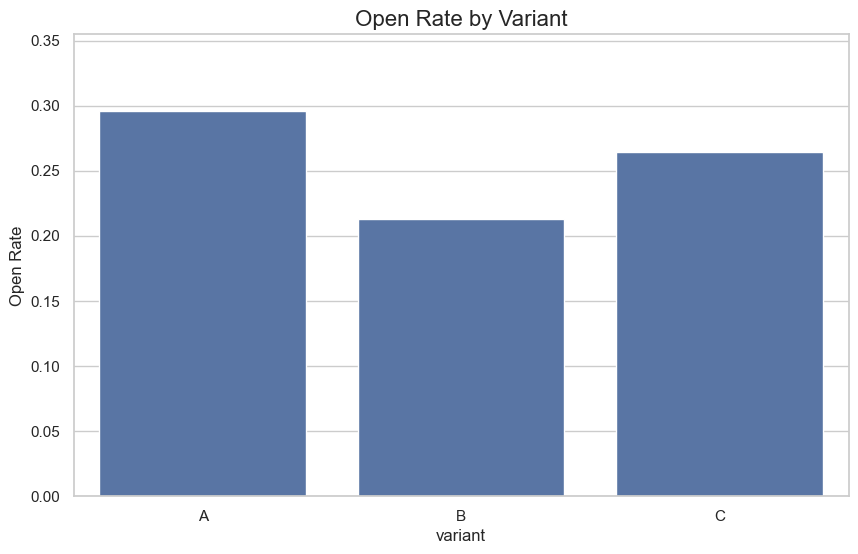

In [24]:
# Variant open rates
plt.figure(figsize=(10,6))
sns.barplot(data=variant_metrics, x='variant', y='open')
plt.title('Open Rate by Variant', fontsize=16)
plt.ylabel('Open Rate')
plt.ylim(0, max(variant_metrics['open']) * 1.2)
plt.savefig(f"{output_dir}/variant_open_rates.png", dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# Conversion funnel using Plotly
funnel_data = []

for variant in variant_metrics['variant']:
    metrics = variant_metrics[variant_metrics['variant'] == variant]
    
    funnel_data.append(go.Funnel(
        name= variant,
        y= ['Users', 'Opens', 'Clicks', 'Conversions'],
        x= [metrics['user_id'].iloc[0], metrics['open'].iloc[0] * metrics['user_id'].iloc[0],
            metrics['click'].iloc[0], metrics['convert'].iloc[0]],
        textinfo="value+percent initial"
    ))

    fig = go.Figure(funnel_data)
    fig.update_layout(title="Conversion Funnel by Variant", showlegend=True)
    fig.show()
    fig.write_image(f"{output_dir}/variant_conversion_funnel.png", scale=2)

### Time Analysis

#### Send Time

In [27]:
# Send_Time Metrics
time_metrics = df.groupby('send_time').agg({
    'user_id': 'count',
    'open': 'mean',
    'click': lambda x: x.sum() / len(x),
    'convert': lambda x: x.sum() / len(x),
    'engagement_score': 'mean'
}).reset_index()

time_metrics.columns = ['send_time', 'count', 'open_rate', 'click_rate', 'conversion_rate', 'engagement_score']

# Save to CSV
time_metrics.to_csv(f"{output_dir}/send_time_metrics.csv", index=False)

print("Send Time Metrics:")
time_metrics

Send Time Metrics:


,send_time,count,open_rate,click_rate,conversion_rate,engagement_score
0,afternoon,99533,0.273105,0.075372,0.008992,0.468809
1,evening,199893,0.230088,0.063419,0.006934,0.391595
2,morning,200574,0.277125,0.076141,0.008570,0.472260


Plotting

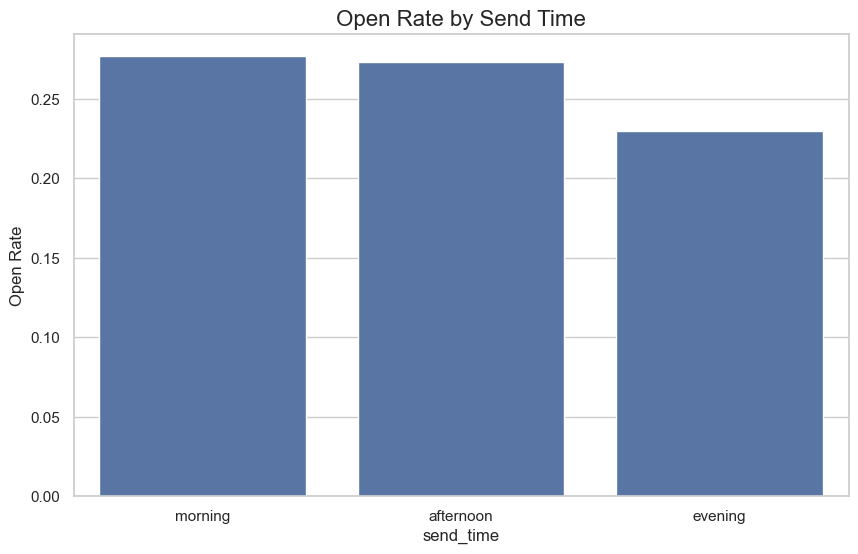

In [30]:
plt.figure(figsize=(10, 6))
send_times = ['morning', 'afternoon', 'evening']
time_metrics['order'] = time_metrics['send_time'].map({
    t: i for i, t in enumerate(send_times)
})
time_metrics = time_metrics.sort_values('order')

sns.barplot(data=time_metrics, x='send_time', y='open_rate')
plt.title('Open Rate by Send Time', fontsize=16)
plt.ylabel('Open Rate')
plt.savefig(f"{output_dir}/send_time_open_rates.png", dpi=300, bbox_inches='tight')
plt.show()

#### Day of Week

In [31]:
# Day of Week Metrics
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_metrics = df.groupby('day_of_week').agg({
    'user_id': 'count',
    'open': 'mean',
    'click': lambda x: x.sum() / len(x),
    'convert': lambda x: x.sum() / len(x),
    'engagement_score': 'mean'
}).reset_index()

day_metrics['order'] = day_metrics['day_of_week'].map({d: i for i, d in enumerate(days)})
day_metrics = day_metrics.sort_values('order')

# Save to CSV
day_metrics.to_csv(f"{output_dir}/day_of_week_metrics.csv", index=False)
print("Day of Week Metrics:")
day_metrics

Day of Week Metrics:


,day_of_week,user_id,open,click,convert,engagement_score,order
1,Monday,71400,0.256891,0.070602,0.007549,0.435840,0
5,Tuesday,71400,0.257703,0.071639,0.008067,0.441317,1
6,Wednesday,71400,0.257157,0.070364,0.007647,0.436120,2
4,Thursday,71400,0.256835,0.070574,0.007955,0.437759,3
0,Friday,71400,0.257927,0.072185,0.008459,0.444594,4
2,Saturday,71600,0.258128,0.071089,0.008142,0.441020,5
3,Sunday,71400,0.257997,0.069860,0.008179,0.438613,6


Plotting

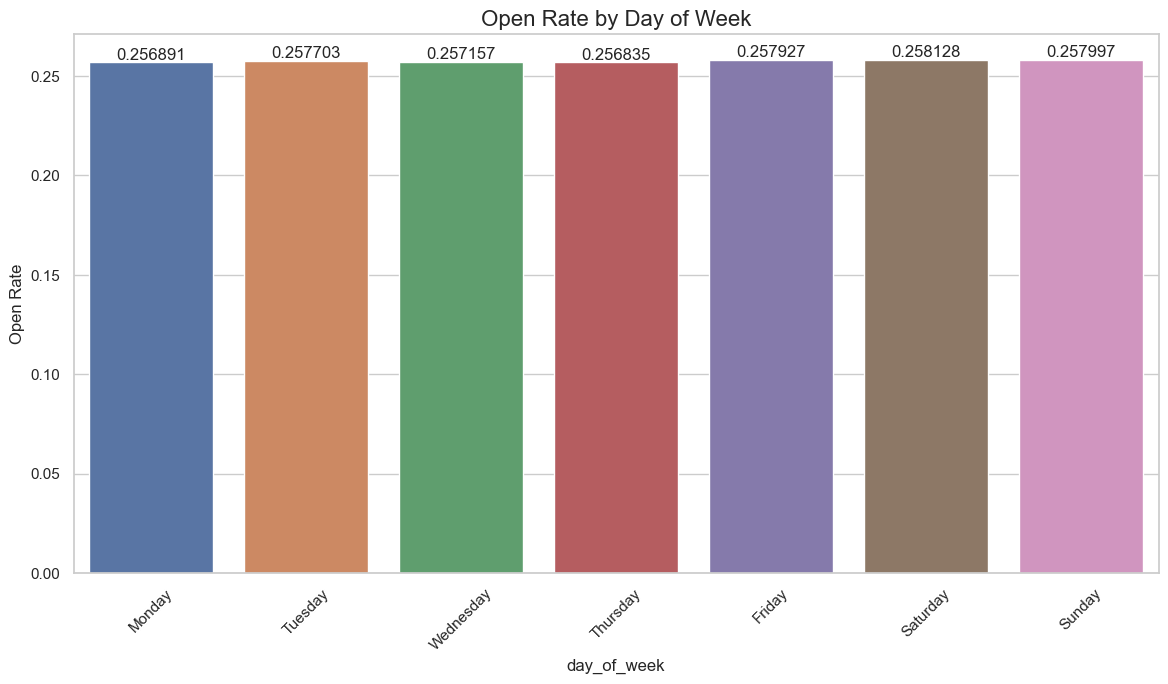

In [35]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=day_metrics, x='day_of_week', y='open', hue='day_of_week')

for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Open Rate by Day of Week', fontsize=16)
plt.ylabel('Open Rate')
plt.xticks(rotation=45)
plt.savefig(f"{output_dir}/day_of_week_open_rates.png", dpi=300, bbox_inches='tight')
plt.show()

#### Time Series Trend

In [36]:
# Time series trend
daily_metrics = df.groupby('date').agg({
    'user_id': 'count',
    'open': 'mean',
    'click': lambda x: x.sum() / len(x),
    'convert': lambda x: x.sum() / len(x)
}).reset_index()

daily_metrics.columns = ['date', 'count', 'open_rate', 'click_rate', 'conversion_rate']
daily_metrics.to_csv(f"{output_dir}/daily_metrics.csv", index=False)

print("Daily Metrics:")
daily_metrics

Daily Metrics:


,date,count,open_rate,click_rate,conversion_rate
0,2023-04-01,35750,0.258014,0.070098,0.007552
1,2023-04-02,35700,0.261345,0.069496,0.008151
2,2023-04-03,35700,0.255294,0.070868,0.007871
3,2023-04-04,35700,0.256331,0.071765,0.007899
4,2023-04-05,35700,0.262773,0.070476,0.007451
5,2023-04-06,35700,0.258487,0.071569,0.007843
6,2023-04-07,35700,0.257199,0.073025,0.008936
7,2023-04-08,35700,0.258067,0.072073,0.008768
8,2023-04-09,35700,0.254650,0.070224,0.008207
9,2023-04-10,35700,0.258487,0.070336,0.007227


Plotting

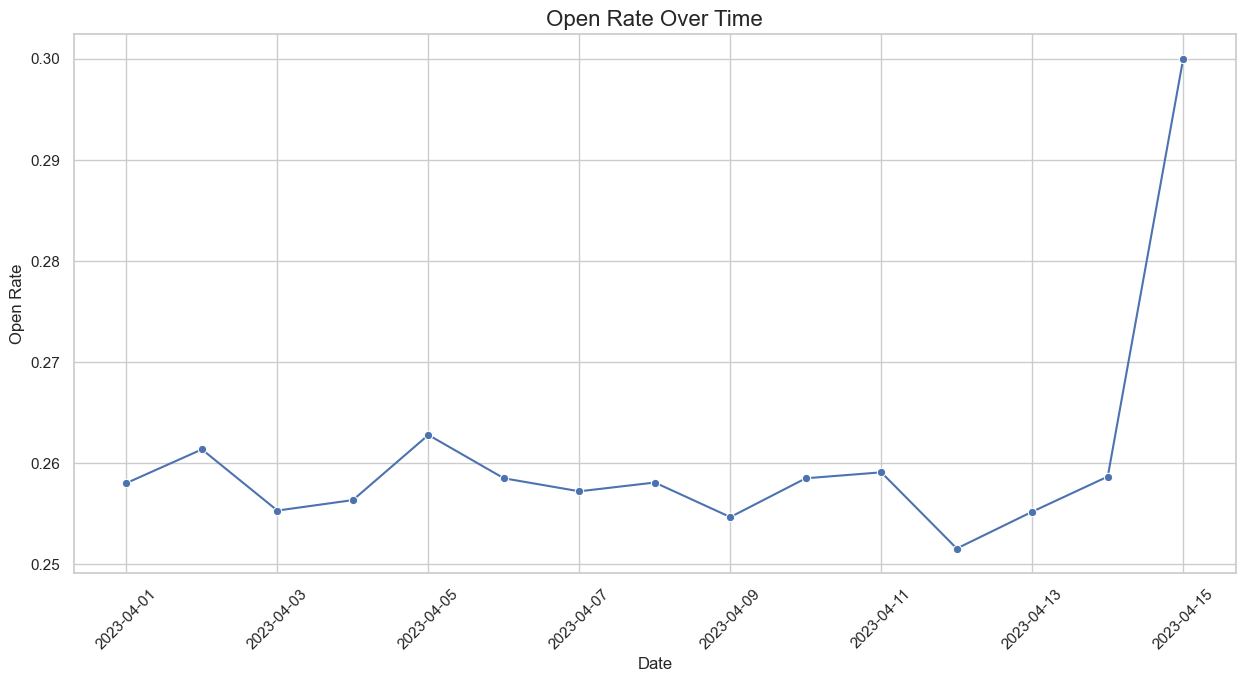

In [38]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=daily_metrics, x='date', y='open_rate', marker='o')
plt.title('Open Rate Over Time', fontsize=16)
plt.ylabel('Open Rate')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.savefig(f"{output_dir}/daily_open_rates.png", dpi=300, bbox_inches='tight')
plt.show()

### Content Layout Analysis

In [39]:
# Content Layout metric
layout_metrics = df.groupby('content_layout').agg({
    'user_id': 'count',
    'open': 'mean',
    'click': lambda x: x.sum() / len(x),
    'convert': lambda x: x.sum() / len(x),
    'engagement_score': 'mean'
}).reset_index()

layout_metrics.columns = ['content_layout', 'count', 'open_rate', 'click_rate', 'conversion_rate', 'engagement_score']

# save to csv
layout_metrics.to_csv(f"{output_dir}/content_layout_metrics.csv", index=False)

print("Content Layout Metrics:")
layout_metrics

Content Layout Metrics:


,content_layout,count,open_rate,click_rate,conversion_rate,engagement_score
0,balanced,150076,0.257183,0.070957,0.007629,0.437245
1,text-heavy,150041,0.255877,0.069494,0.007931,0.434521
2,visual-heavy,199883,0.259007,0.071917,0.008330,0.444490


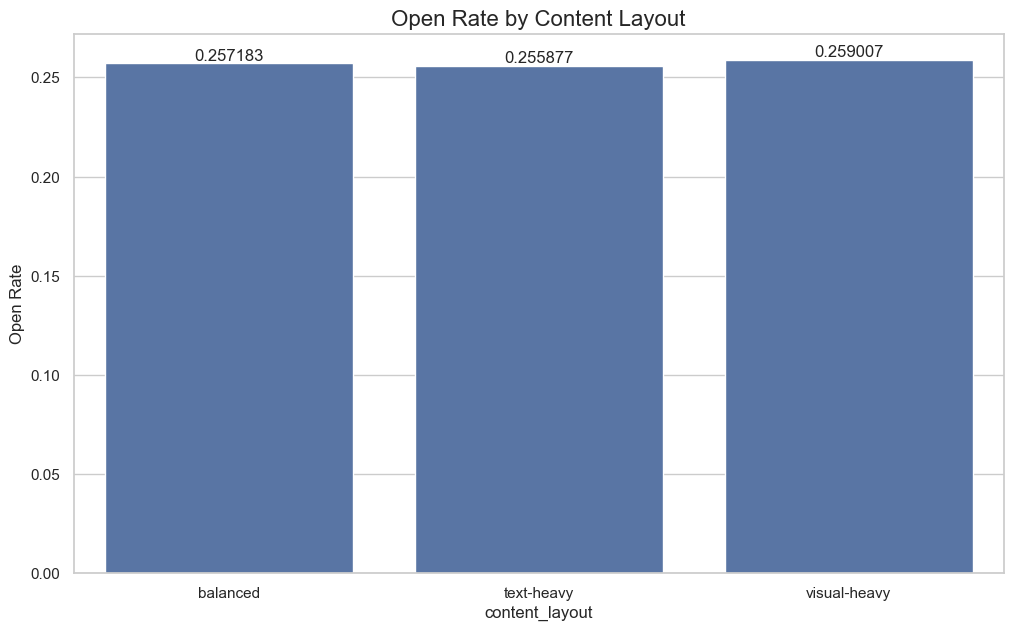

In [42]:
# Plotting
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=layout_metrics, x='content_layout', y='open_rate', errorbar=('ci', 95))

for i in ax.containers:
    ax.bar_label(i,)

plt.title('Open Rate by Content Layout', fontsize=16)
plt.ylabel('Open Rate')
plt.savefig(f"{output_dir}/content_layout_open_rates.png", dpi=300, bbox_inches='tight')
plt.show()

### User Segment Analysis

In [43]:
# User Segment Metric
segment_metrics = df.groupby('user_segment').agg({
    'user_id': 'count',
    'open': 'mean',
    'click': lambda x: x.sum() / len(x),
    'convert': lambda x: x.sum() / len(x),
    'engagement_score': 'mean'
}).reset_index()

segment_metrics.columns = ['user_segment', 'count', 'open_rate', 'click_rate', 'conversion_rate', 'engagement_score']

# save to csv
segment_metrics.to_csv(f"{output_dir}/user_segment_metrics.csv", index=False)

print("User Segment Metrics:")
segment_metrics

User Segment Metrics:


,user_segment,count,open_rate,click_rate,conversion_rate,engagement_score
0,active,382829,0.271748,0.076034,0.009009,0.468862
1,inactive,75369,0.184771,0.045642,0.003635,0.294232
2,new,39302,0.257849,0.068699,0.006463,0.427561
3,unknown,2500,0.266800,0.081200,0.009200,0.475200


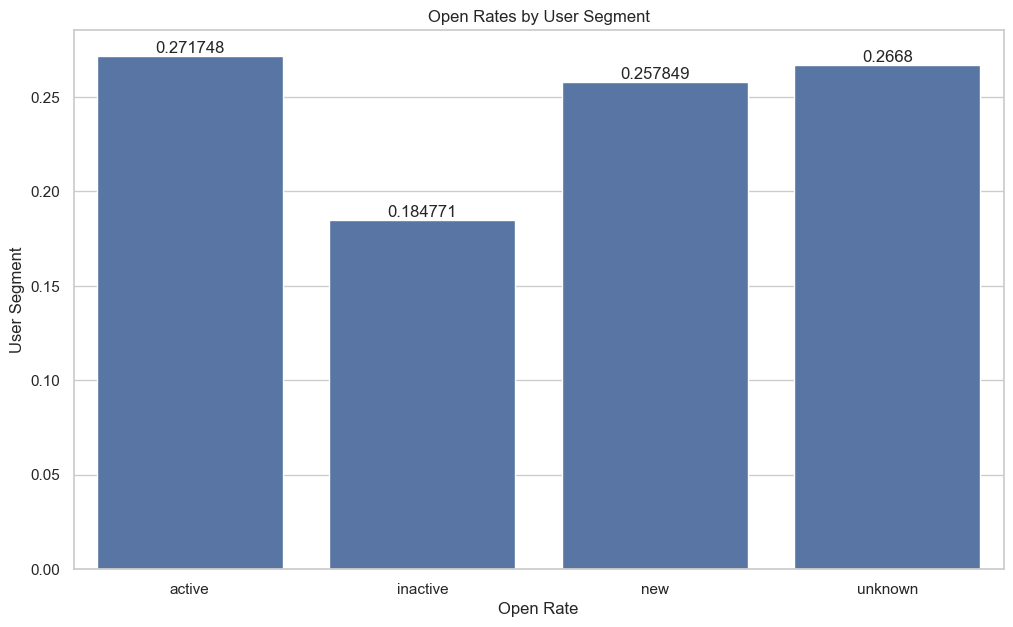

In [44]:
# Plotting
plt.figure(figsize=(12, 7))

ax = sns.barplot(data=segment_metrics, x='user_segment', y='open_rate', errorbar=('ci', 95))

for i in ax.containers:
    ax.bar_label(i,)

plt.title('Open Rates by User Segment')
plt.ylabel('User Segment')
plt.xlabel('Open Rate')
plt.savefig(f"{output_dir}/user_segment_open_rates.png", dpi=300, bbox_inches='tight')
plt.show()

### Device Analysis